In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [131]:
# Loading the data
file_path = '/content/drive/MyDrive/Encryptix/Advertising/advertising.csv'
advertising_1 = pd.read_csv(file_path)

print(advertising_1.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [132]:
advertising_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [133]:
advertising_1.shape

(200, 4)

In [134]:
advertising.describe(include='all')

,TV,Radio,Newspaper,Sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,15.100000
std,85.443221,14.862111,20.446303,5.271184
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,11.000000
50%,149.750000,22.400000,25.600000,16.000000
75%,218.475000,36.325000,44.050000,18.975000
max,293.600000,49.600000,89.400000,27.000000


In [135]:
# Data Cleaning
advertising_1.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

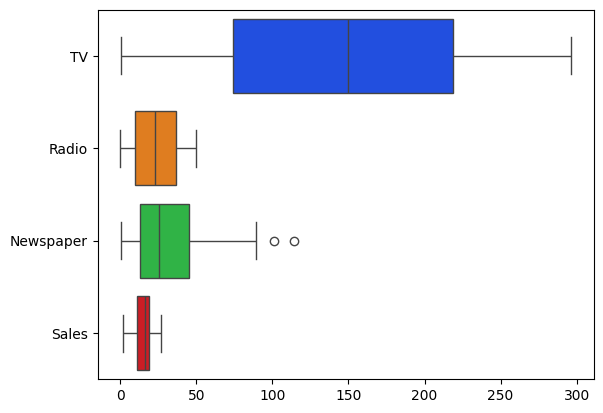

In [136]:
# prompt: boxplot in a straight line with different colors

sns.boxplot(
    data=advertising_1,
    orient="h",
    palette="bright"
)
plt.show()

In [137]:
# prompt: Remove outliers whose Zscore is >3 especially in the newspaper colum

from scipy import stats

# Calculate z-scores for the newspaper column
z_scores = stats.zscore(advertising_1['Newspaper'])

# Define a threshold for outlier removal
threshold = 3

# Select rows where the z-score is within the threshold
advertising = advertising_1[np.abs(z_scores) <= threshold]

# Print the updated DataFrame
print(advertising.head())

print("Shape of the Dataframe:", advertising.shape)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Shape of the Dataframe: (198, 4)


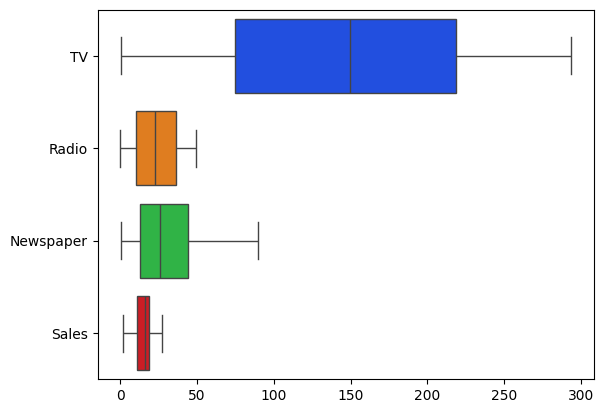

In [138]:
#boxplot in a straight line with different colors

sns.boxplot(
    data=advertising,
    orient="h",
    palette="bright"
)
plt.show()

There are no considerable outliers present in the data.

**EDA**

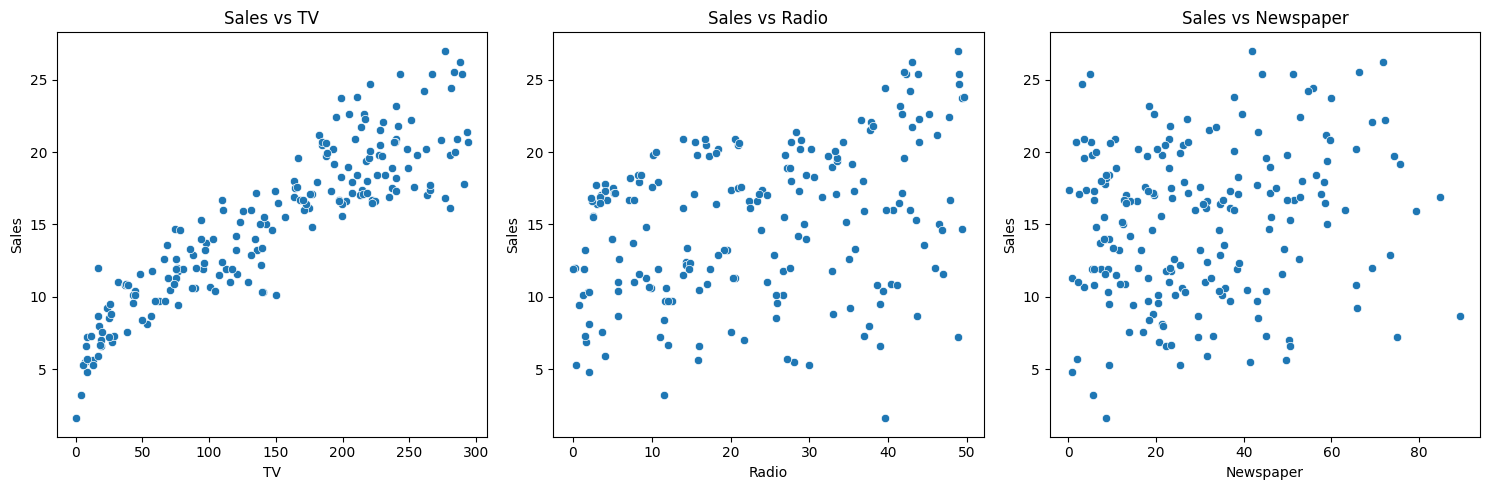

In [139]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Plotting scatter plots
plt.subplot(1, 3, 1)
sns.scatterplot(data=advertising, x='TV', y='Sales')
plt.title('Sales vs TV')

plt.subplot(1, 3, 2)
sns.scatterplot(data=advertising, x='Radio', y='Sales')
plt.title('Sales vs Radio')

plt.subplot(1, 3, 3)
sns.scatterplot(data=advertising, x='Newspaper', y='Sales')
plt.title('Sales vs Newspaper')

plt.tight_layout()
plt.show()

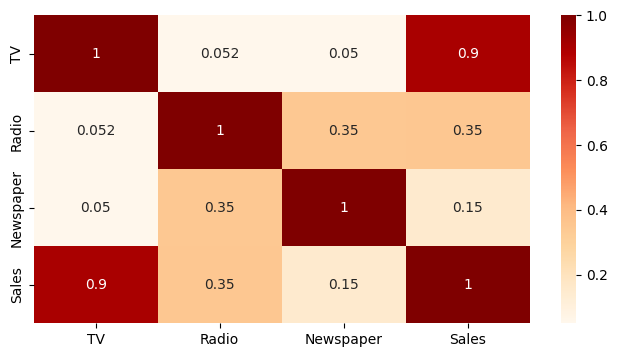

In [140]:
# prompt: correlation between the differnt element correlation matrix color map

plt.figure(figsize=(8, 4))
sns.heatmap(advertising.corr(), annot=True, cmap="OrRd")
plt.show()


From the above plot, we can clearly see that the maximum impact on sales is based on the advertising through TV. So we will go ahead and perform simple linear regression using TV as our feature variable.

# Simple Linear Regression using TV advertising expenditure

In [141]:
# Feature and target variable
X = advertising[['TV']]
y = advertising['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
X_train.head()

,TV
139,184.9
5,8.7
67,139.3
140,73.4
106,25.0


In [143]:
y_train.head()

139    20.7
5       7.2
67     13.4
140    10.9
106     7.2
Name: Sales, dtype: float64

In [144]:
# Create a linear regression model
model_tv = LinearRegression()

# Train the model
model_tv.fit(X_train, y_train)

LinearRegression()

In [145]:
# Make predictions
y_train_pred_tv = model_tv.predict(X_train)
y_pred_tv = model_tv.predict(X_test)

# Evaluate the model
mse_tv = mean_squared_error(y_test, y_pred_tv)
r2_tv = r2_score(y_test, y_pred_tv)
rmse_tv = np.sqrt(mse_tv)

print(f'Simple Linear Regression with TV')
print(f'Mean Squared Error (MSE): {mse_tv}')
print(f'Root Mean Squared Error (RMSE): {rmse_tv}')
print(f'R-squared (R²): {r2_tv}')

Simple Linear Regression with TV
Mean Squared Error (MSE): 4.948104585614338
Root Mean Squared Error (RMSE): 2.224433542638291
R-squared (R²): 0.8217997347359163


<ipython-input-146-c18916119aff>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_train_tv, bins=15)


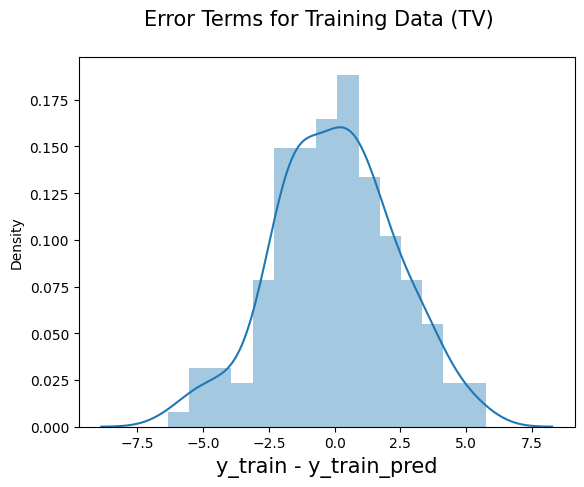

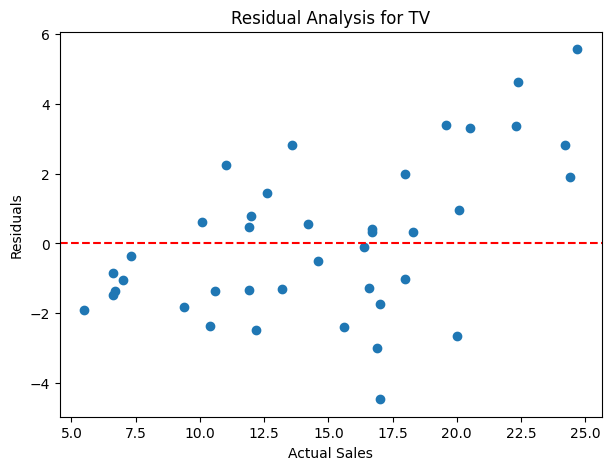

In [146]:
# Residual Analysis for training data
residuals_train_tv = y_train - y_train_pred_tv
fig = plt.figure()
sns.distplot(residuals_train_tv, bins=15)
fig.suptitle('Error Terms for Training Data (TV)', fontsize=15)  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize=15)  # X-label
plt.show()

# Residual Analysis for test data
residuals_tv = y_test - y_pred_tv
plt.figure(figsize=(7, 5))
plt.scatter(y_test, residuals_tv)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residual Analysis for TV')
plt.show()

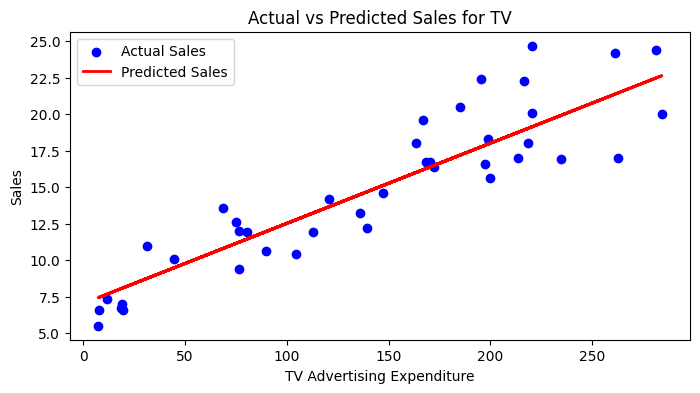

In [147]:
# Visualizing the fit
plt.figure(figsize=(8, 4))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred_tv, color='red', linewidth=2, label='Predicted Sales')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales for TV')
plt.legend()
plt.show()

In [148]:
# Multiple Linear Regression using TV, Radio, and Newspaper advertising expenditures

# Features and target variable
X_1 = advertising[['TV', 'Radio', 'Newspaper']]
y_1 = advertising['Sales']

# Split the data into training and testing sets
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [149]:
# Create a linear regression model
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X_1_train, y_1_train)

LinearRegression()

In [150]:
# Make predictions
y_pred_multiple = model_multiple.predict(X_1_test)

# Evaluate the model
mse_multiple = mean_squared_error(y_1_test, y_pred_multiple)
r2_multiple = r2_score(y_1_test, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)

print(f'Multiple Linear Regression with TV, Radio, and Newspaper')
print(f'Mean Squared Error (MSE): {mse_multiple}')
print(f'Root Mean Squared Error (RMSE): {rmse_multiple}')
print(f'R-squared (R²): {r2_multiple}')

Multiple Linear Regression with TV, Radio, and Newspaper
Mean Squared Error (MSE): 2.415728945593508
Root Mean Squared Error (RMSE): 1.5542615434969458
R-squared (R²): 0.9130003152798273


<ipython-input-151-ff1ac69af3c3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_train_multiple, bins=15)


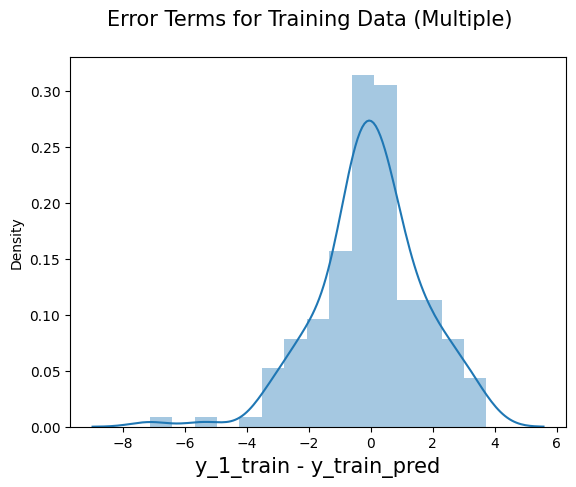

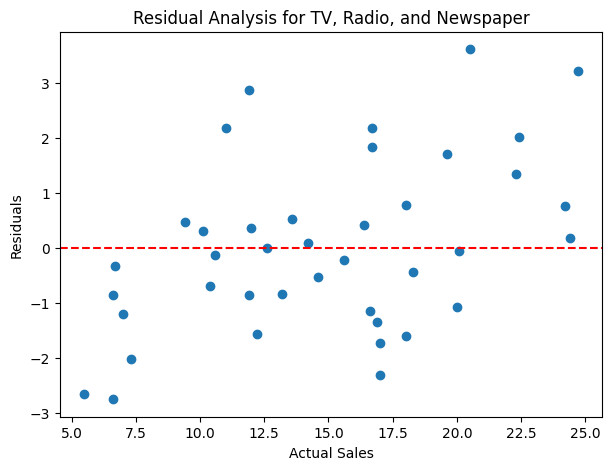

In [151]:
# Residual Analysis for training data
y_train_pred_multiple = model_multiple.predict(X_1_train)
residuals_train_multiple = y_1_train - y_train_pred_multiple
fig = plt.figure()
sns.distplot(residuals_train_multiple, bins=15)
fig.suptitle('Error Terms for Training Data (Multiple)', fontsize=15)  # Plot heading
plt.xlabel('y_1_train - y_train_pred', fontsize=15)  # X-label
plt.show()

# Residual Analysis for test data
residuals_multiple = y_1_test - y_pred_multiple
plt.figure(figsize=(7, 5))
plt.scatter(y_1_test, residuals_multiple)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residual Analysis for TV, Radio, and Newspaper')
plt.show()

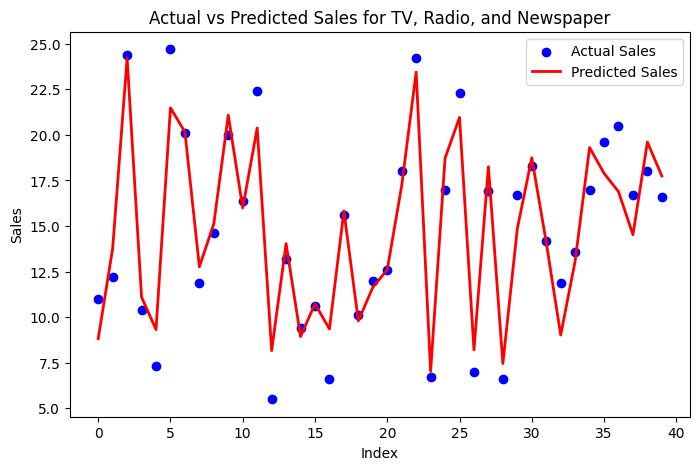

In [152]:
# Visualizing the fit
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_1_test)), y_1_test, color='blue', label='Actual Sales')
plt.plot(range(len(y_1_test)), y_pred_multiple, color='red', linewidth=2, label='Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales for TV, Radio, and Newspaper')
plt.legend()
plt.show()

In [153]:
# Test the model with a random sample
random_sample = advertising.sample(n=1, random_state=42)
print(f"Random Sample:\n{random_sample}")

# Predict using the simple model (TV)
tv_sample_pred = model_tv.predict(random_sample[['TV']])
print(f"Predicted Sales (Simple Model with TV): {tv_sample_pred[0]}")

# Predict using the multiple model (TV, Radio, Newspaper)
multiple_sample_pred = model_multiple.predict(random_sample[['TV', 'Radio', 'Newspaper']])
print(f"Predicted Sales (Multiple Model): {multiple_sample_pred[0]}")

Random Sample:
      TV  Radio  Newspaper  Sales
66  31.5   24.6        2.2   11.0
Predicted Sales (Simple Model with TV): 8.754706158346249
Predicted Sales (Multiple Model): 8.82481623403234


In [154]:
# Test the model with a random sample
random_sample = advertising.sample(n=1)
print(f"Random Sample:\n{random_sample}")

# Predict using the simple model (TV)
tv_sample_pred = model_tv.predict(random_sample[['TV']])
print(f"Predicted Sales (Simple Model with TV): {tv_sample_pred[0]}")

# Predict using the multiple model (TV, Radio, Newspaper)
multiple_sample_pred = model_multiple.predict(random_sample[['TV', 'Radio', 'Newspaper']])
print(f"Predicted Sales (Multiple Model): {multiple_sample_pred[0]}")

Random Sample:
        TV  Radio  Newspaper  Sales
110  225.8    8.2       56.5   18.4
Predicted Sales (Simple Model with TV): 19.431552843865212
Predicted Sales (Multiple Model): 18.05803679068719


In [155]:
# Test the model with a random sample
random_sample = advertising.sample(n=1)
print(f"Random Sample:\n{random_sample}")

# Predict using the simple model (TV)
tv_sample_pred = model_tv.predict(random_sample[['TV']])
print(f"Predicted Sales (Simple Model with TV): {tv_sample_pred[0]}")

# Predict using the multiple model (TV, Radio, Newspaper)
multiple_sample_pred = model_multiple.predict(random_sample[['TV', 'Radio', 'Newspaper']])
print(f"Predicted Sales (Multiple Model): {multiple_sample_pred[0]}")

Random Sample:
       TV  Radio  Newspaper  Sales
30  292.9   28.3       43.2   21.4
Predicted Sales (Simple Model with TV): 23.11871914648139
Predicted Sales (Multiple Model): 23.609763646840797
